In [1]:
import numpy as np;
import matplotlib.pyplot as plt;
import scipy;
from scipy import ndimage
from sklearn.linear_model import LogisticRegression
import pandas;
import os;
import tensorflow as tf
from sklearn.externals import joblib
%matplotlib inline

In [2]:
print (os.getcwd())
images = os.listdir("Face/vid");

#This below code dynamically calculates the size of total data set.
train_size = len(images)+len(os.listdir("Face/vidFalse"))
#Face/vid contains true values and #Face/vidFalse contains false values.


count = 0
pixel = 100; #change the pixel size if the data set changes

#Depending on the size, X(Features) and Y(Labels) get initialized to zero.
train_data_X = np.zeros((train_size,pixel,pixel),dtype=float)
train_data_Y = np.zeros((train_size,2),dtype=float)

#It loads the true values and puts it in the train_data_X and sets train_data_y=1 ;
for i in images:
    img = np.array(plt.imread('Face/vid/'+i),dtype=float);
    train_data_X[count]=img*((img.max()-img.min())/img.max());#normalizes the data
    train_data_Y[count]=[0,1];
    count = count+1
    
images = os.listdir("Face/vidFalse");

#It loads the false values and puts it in the train_data_X and sets train_data_y=0;
for i in images:
    img = np.array(plt.imread('Face/vidFalse/'+i),dtype=float);
    train_data_X[count]=img/(img.max());
    train_data_Y[count]=[1,0];
    count = count+1
    
print (train_data_X.shape)
print (train_data_Y.shape)


/notebooks/project/datasci
(563, 100, 100)
(563, 2)


In [3]:
def randomize(dataset, labels):
  permutation = np.random.permutation(labels.shape[0])
  shuffled_dataset = dataset[permutation,:,:]
  shuffled_labels = labels[permutation]
  return shuffled_dataset, shuffled_labels
train_dataset, train_labels = randomize(train_data_X,train_data_Y)

(563, 100, 100)
[ 0.  1.]


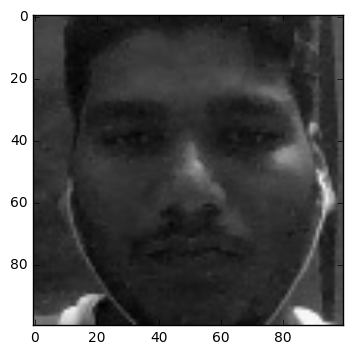

[ 1.  0.]


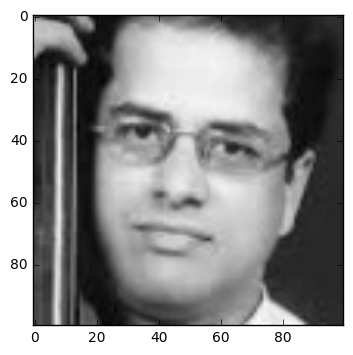

[ 1.  0.]


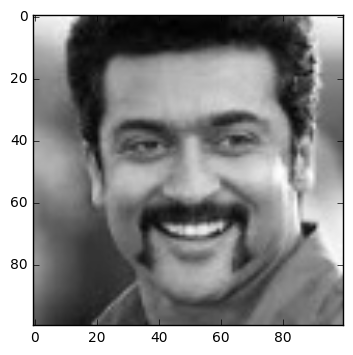

[ 1.  0.]


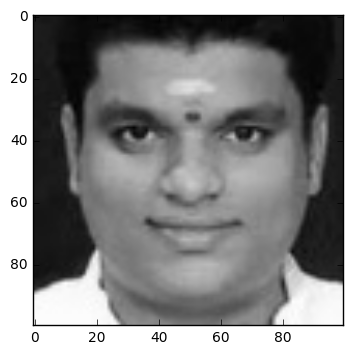

[ 0.  1.]


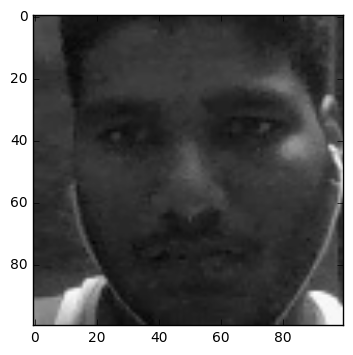

[ 1.  0.]


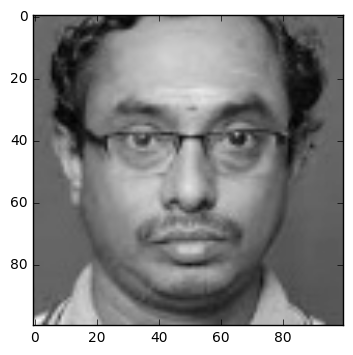

[ 1.  0.]


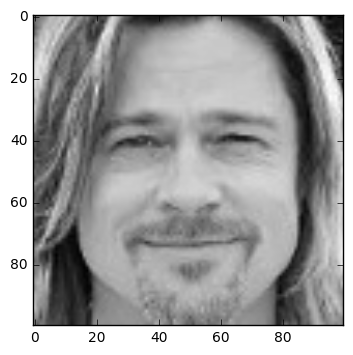

[ 0.  1.]


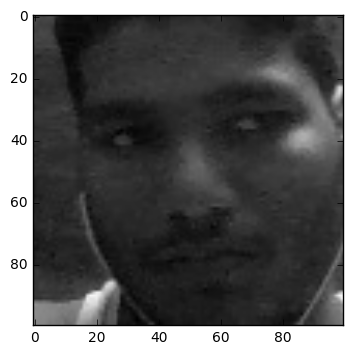

[ 0.  1.]


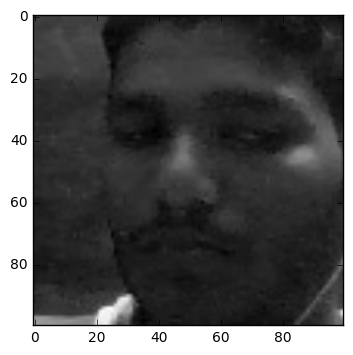

[ 0.  1.]


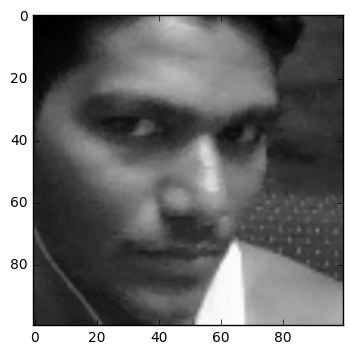

In [4]:
print (train_dataset.shape)
for i in xrange(0,len(train_dataset[:10])):
    print(train_labels[i])
    plt.imshow(train_dataset[i],cmap='gray');
    plt.show();

In [5]:
image_size = 100
train_size = 500;
X_train = train_dataset[0:train_size].reshape(train_size,(image_size*image_size)).astype(np.float32);
y_train = train_labels[0:train_size][:].astype(np.float32)
X_test = train_dataset[train_size:].reshape(train_dataset[train_size:].shape[0],(image_size*image_size)).astype(np.float32);
y_test = train_labels[train_size:][:].astype(np.float32)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(500, 10000)
(500, 2)
(63, 10000)
(63, 2)


In [ ]:
X_train[]

In [6]:
image_size = 100
num_labels = 2
num_steps = 100
batch_size = 30
alpha = 0.01;

In [7]:

def conv2d(x, W):
    return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

def max_pool_2x2(x):
    return tf.nn.max_pool(x, ksize=[1, 2, 2, 1],
                        strides=[1, 2, 2, 1], padding='SAME')
def initNN():
    Weight = tf.Variable(tf.truncated_normal([5,5,1,16]))
    Weight1 = tf.Variable(tf.truncated_normal([4,4,16,32]))
    Weight2 = tf.Variable(tf.truncated_normal([4,4,32,48]))
    Weight3 = tf.Variable(tf.truncated_normal([13*13*48,1024]))
    Weight4 = tf.Variable(tf.truncated_normal([1024,num_labels]))
    bias = tf.Variable(tf.truncated_normal([16]))
    bias1 = tf.Variable(tf.truncated_normal([32]))
    bias2 = tf.Variable(tf.truncated_normal([48]))
    bias3 = tf.Variable(tf.truncated_normal([1024]))
    bias4 = tf.Variable(tf.truncated_normal([num_labels]))
    return [Weight,bias,Weight1,bias1,Weight2,bias2,Weight3,bias3,Weight4,bias4]

def forwardCNN(X,W):
    X = tf.reshape(X,[-1,image_size,image_size,1])
    
    #1st Conv layer with max_pool
    H1 = conv2d(X,W[0])+W[1];
    H1 = tf.nn.relu(H1);
    H2 = max_pool_2x2(H1);
    
    #2nd Conv layer with max_pool
    H2 = conv2d(H2,W[2])+W[3];
    H2 = tf.nn.relu(H2);
    H3 = max_pool_2x2(H2);
    
    #3rd Conv layer with max_pool
    H3 = conv2d(H3,W[4])+W[5];
    H3 = tf.nn.relu(H3);
    H4 = max_pool_2x2(H3);
    
    #fully connected layer
    H4 = tf.reshape(H4, [-1, 13*13*48])
    H4 = tf.matmul(H4,W[6])+W[7];
    H4 = tf.nn.relu(H4);
    
    #output layer
    H4 = tf.matmul(H4,W[8])+W[9];
    return H4

graph = tf.Graph()
with graph.as_default():
    X = tf.placeholder(tf.float32,[None,image_size*image_size])
    y = tf.placeholder(tf.float32,[None,num_labels])
    W = initNN()
    H_CNN = forwardCNN(X,W)
    loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(H_CNN,y))
    optimizer = tf.train.AdamOptimizer(alpha).minimize(loss)
    train_prediction = (H_CNN)
    valid_prediction = (forwardCNN(X_test,W))
    test = tf.nn.softmax(H_CNN)
    tf.summary.scalar("accuracy",loss);
    #tf.summary.image("Con")
    summary = tf.summary.merge_all();

Initialized
Minibatch loss at step 0: 497859.718750
('mini batch accuracy: ', 90.0)
('Validation accuracy: ', 73.01587301587301)
Minibatch loss at step 20: 14180629.000000
('mini batch accuracy: ', 66.66666666666667)
('Validation accuracy: ', 73.01587301587301)
Minibatch loss at step 40: 20024620.000000
('mini batch accuracy: ', 43.333333333333336)
('Validation accuracy: ', 100.0)
Minibatch loss at step 60: 0.000000
('mini batch accuracy: ', 100.0)
('Validation accuracy: ', 96.82539682539682)
Minibatch loss at step 80: 0.000000
('mini batch accuracy: ', 100.0)
('Validation accuracy: ', 100.0)
Model saved in file: FaceModels/model.ckpt
done


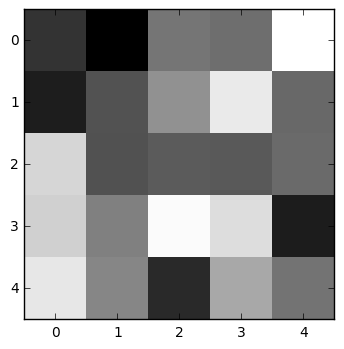

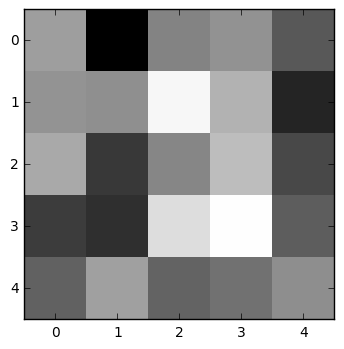

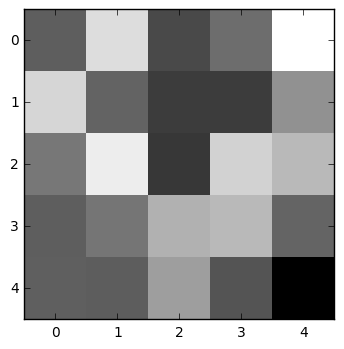

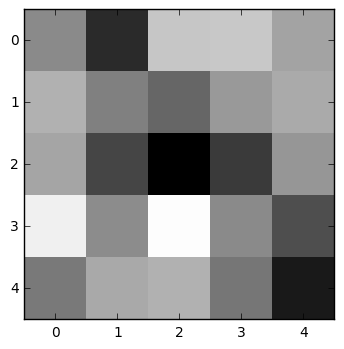

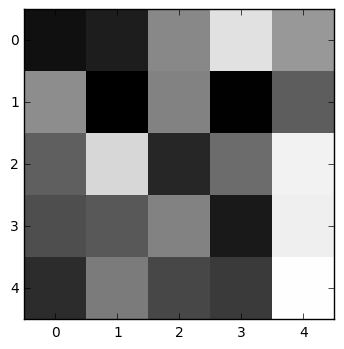

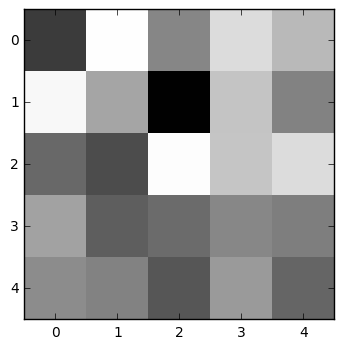

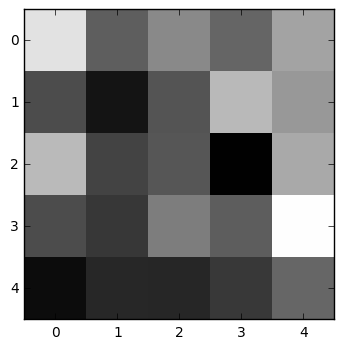

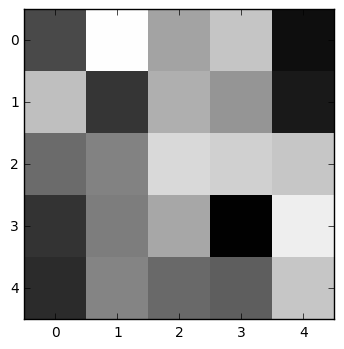

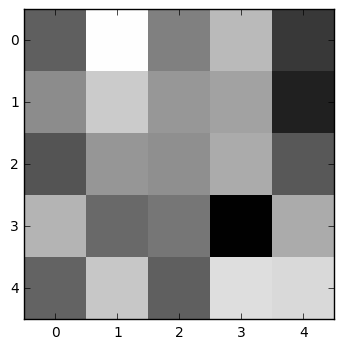

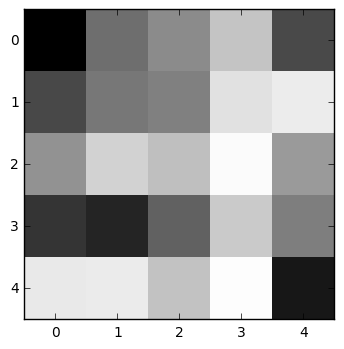

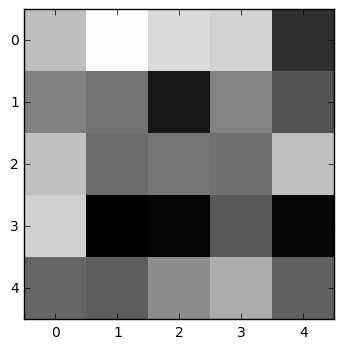

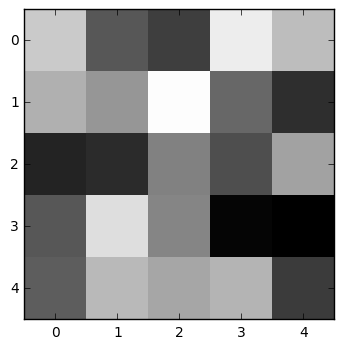

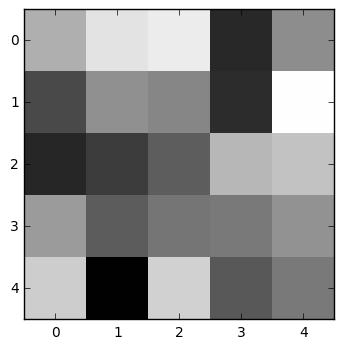

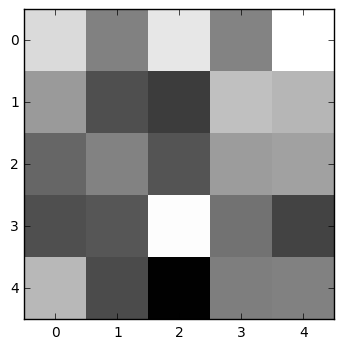

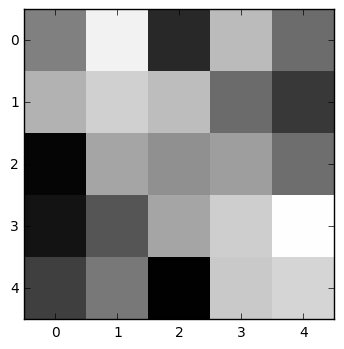

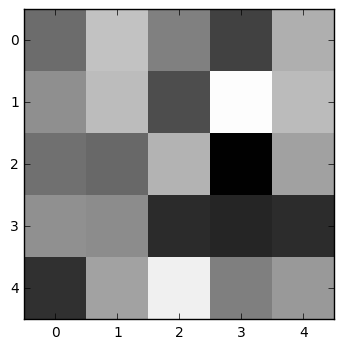

In [10]:
def accuracy(predictions, labels):
    eq = (np.argmax(predictions, 1) == np.argmax(labels, 1))
    return ((100.0 * np.sum(eq))/eq.size)

"""
def accuracy(predictions, labels):
    eq = (predictions == labels)
    return ((100.0 * np.sum(eq))/eq.size)
"""
with tf.Session(graph=graph) as session:
    tf.global_variables_initializer().run()
    writer = tf.summary.FileWriter("/tmp/tensorflow")
    offset=0
    print("Initialized")
    for step in range(num_steps):
        offset = (step * batch_size) % (X_train.shape[0] - batch_size)
        batch_data = X_train[offset:(offset + batch_size), :]
        batch_labels = y_train[offset:(offset + batch_size), :]
        feed_dict = {X : batch_data, y : batch_labels}
        _, l, predictions,s = session.run([optimizer, loss, train_prediction,summary],feed_dict=feed_dict)
        if (step % 20 == 0):
            print("Minibatch loss at step %d: %f" % (step, l))
            print("mini batch accuracy: ", accuracy(predictions, batch_labels))            
            print("Validation accuracy: ", accuracy(valid_prediction.eval(), y_test))
    saver = tf.train.Saver(W);
    save_path = saver.save(session, "FaceModels/model.ckpt")
    writer.add_graph(session.graph);
    writer.add_summary(s)
    print("Model saved in file: %s" % save_path)
    print("done")
    con1 = W[0].eval()
    con1 = con1.reshape(16,1,5,5)
    for i in range(16):
        plt.imshow(con1[i][0],cmap='gray',interpolation="none")
        plt.show()

In [ ]:
Weights = W
Weights = joblib.load( open( "FaceModels/vig_face.pkl", "rb" ) )

In [ ]:
con1 = Weights[0]
#con1 = con1.transpose()
print(con1.eval())
con1 = con1.reshape(16,1,5,5)
for i in range(16):
    plt.imshow(con1[i][0],cmap='gray',interpolation="none")
    plt.show()